In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
from data.dataset import ModelNet40, collate_fn
import os
import numpy as np

from utils import *
from model import *
from torch.utils.data import DataLoader

In [4]:
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'
device

'cuda'

### Getting the dataset path

In [5]:
os.chdir('..')
modelnet40_path = os.path.join(os.getcwd(), 'ModelNet40')
os.chdir('TransformersFor3dPointCLouds')
print(modelnet40_path)

/scratch/users/ahamadeh18/COMP390/ModelNet40


### Initalizing the training set DataLoader object

In [7]:
SAMPLE_SIZE = 128
TEST = False
SAMPLING_METHOD = 'fps'

In [8]:
model_net40 = ModelNet40(dataset_path=modelnet40_path, test=TEST, sample_size=SAMPLE_SIZE, sampling=SAMPLING_METHOD)

### Creating the model

In [9]:
in_features = 3
feature_dim = 128
out_features = 1024
k_size = 4
NUM_CLASSES = 40

In [10]:
model = PointCloudClassifier(in_features, feature_dim, out_features, k_size, NUM_CLASSES)

## Training specifications:

### Optimizer:

In [11]:
from torch.optim import SGD
from torch.optim.lr_scheduler import CosineAnnealingLR

parameters = model.parameters()
learning_rate = 1e-3
momentum = 0.9

optimizer = SGD(parameters, lr=learning_rate, momentum=momentum)

step = len(model_net40)
scheduler = CosineAnnealingLR(optimizer, step)

### Loss function:

In [12]:
from torch.nn import CrossEntropyLoss
from torch.nn import NLLLoss

class_weights =  torch.tensor(model_net40.class_weights).float()
criterion = CrossEntropyLoss(weight=class_weights)
# criterion = NLLLoss()

In [27]:
overfitting_data = []
for i in range(20):
    overfitting_data.append(model_net40[i])
overfitting_loader = DataLoader(overfitting_data)

## Overfitting the model

In [30]:
from train import train
epochs = 15
loss = train(model=model, optimizer=optimizer,
          scheduler=scheduler, train_loader=overfitting_loader,
          criterion=criterion, epochs=epochs, verbose=False)

  0%|          | 0/20 [00:00<?, ?it/s]


RuntimeError: t() expects a tensor with <= 2 dimensions, but self is 3D

### Plotting the loss:

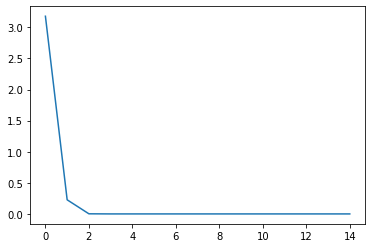

In [28]:
import matplotlib.pyplot as plt
plt.plot(loss)

In [30]:
x_test = model(model_net40[0][0].float())
(torch.argmax(x_test) == model_net40[0][1]).item()

True

In [31]:
x_test

tensor([46.0388, -0.1911, -1.2720, -0.5212, -1.1767, -1.7760, -1.1018, -1.4636,
        -0.6017, -0.4255, -1.2653, -1.4788, -0.7948, -1.6204, -1.0603, -1.0340,
        -1.2143, -0.8255, -1.5459, -1.4086,  0.1541, -1.1079, -1.7431, -0.3271,
        -1.8796, -1.3339, -1.5646, -0.3407, -1.3065, -0.4129, -1.1565, -0.8027,
        -0.9239, -1.6641, -1.1740, -1.9464, -1.5179, -0.6686, -1.0703, -1.2988],
       grad_fn=<AddBackward0>)

In [39]:
print(torch.nn.Softmax(dim=0)(x_test))

tensor([1.0000e+00, 8.3673e-21, 2.8389e-21, 6.0151e-21, 3.1229e-21, 1.7150e-21,
        3.3658e-21, 2.3441e-21, 5.5498e-21, 6.6193e-21, 2.8580e-21, 2.3086e-21,
        4.5752e-21, 2.0039e-21, 3.5083e-21, 3.6019e-21, 3.0076e-21, 4.4369e-21,
        2.1588e-21, 2.4764e-21, 1.1818e-20, 3.3454e-21, 1.7724e-21, 7.3036e-21,
        1.5462e-21, 2.6687e-21, 2.1187e-21, 7.2045e-21, 2.7427e-21, 6.7033e-21,
        3.1866e-21, 4.5392e-21, 4.0209e-21, 1.9182e-21, 3.1314e-21, 1.4463e-21,
        2.2201e-21, 5.1906e-21, 3.4735e-21, 2.7640e-21],
       grad_fn=<SoftmaxBackward0>)


## Training the model

In [40]:
model = PointCloudClassifier(in_features, feature_dim, out_features, k_size, NUM_CLASSES)

### DataLoader

In [41]:
SAMPLE_SIZE = 128
TEST = False
SAMPLING_METHOD = 'fps'

model_net40 = ModelNet40(dataset_path=modelnet40_path, test=TEST, sample_size=SAMPLE_SIZE, sampling=SAMPLING_METHOD)

In [42]:
batch_size = 32

In [43]:
from torch.utils.data import DataLoader

train_loader = DataLoader(model_net40, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

### Optimizer:

In [44]:
from torch.optim import SGD
from torch.optim.lr_scheduler import CosineAnnealingLR

parameters = model.parameters()
learning_rate = 1e-4
momentum = 0.9

optimizer = SGD(parameters, lr=learning_rate, momentum=momentum)

step = len(model_net40)
scheduler = CosineAnnealingLR(optimizer, step)

### Loss function:

In [53]:
from torch.nn import CrossEntropyLoss
from torch.nn import NLLLoss

class_weights =  torch.tensor(model_net40.class_weights).float()
criterion = CrossEntropyLoss(weight=class_weights)

In [ ]:
epochs = 5
loss = train(model=model, optimizer=optimizer,
          scheduler=scheduler, train_loader=model_net40,
          criterion=criterion, epochs=epochs, save_params=True, verbose=False, load_model=True)

100%|██████████| 9843/9843 [1:41:44<00:00,  1.61it/s]  


epoch: 0 | loss: 12083.202962384292
Epoch time: 6104.91911649704


100%|██████████| 9843/9843 [2:59:17<00:00,  1.09s/it]   


epoch: 1 | loss: 15915.664114731015
Epoch time: 10757.768959760666


 22%|██▏       | 2210/9843 [08:14<2:40:27,  1.26s/it]

## Model Evaluation:

### Loading the test set:

In [ ]:
SAMPLE_SIZE = 128
TEST = True
SAMPLING_METHOD = 'fps'
batch_size = 1

model_net_256_test = ModelNet40(dataset_path=modelnet40_path, test=TEST, sample_size=SAMPLE_SIZE, sampling=SAMPLING_METHOD)
test_laoder = DataLoader(model_net_256_test, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

In [ ]:
from eval import evaluate

In [ ]:
evaluate(model, model_net_256_test, epochs, verbose=True)

In [121]:
data, label, _ = model_net_256_test[0]

In [122]:
yhat = model(data.float())
print(label)
print((torch.argmax(yhat) == label).item())

tensor(0)
True


In [123]:
accuracy = 0
N = len(model_net_256_test)
model.eval()
for point in model_net_256_test:
    if point == None:
        N -= 1
        continue
    x, y, _ = point
    yhat = model(x.float())
    
    if (torch.argmax(yhat) == y).item():
        accuracy += 1

In [124]:
acc = accuracy / N

In [125]:
acc

0.0078060805258833195